In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | krasnovishersk
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | bud
Processing Record 23 of Set 1 | bengkulu


Processing Record 38 of Set 4 | vrede
Processing Record 39 of Set 4 | surt
Processing Record 40 of Set 4 | wajima
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | talpa
Processing Record 43 of Set 4 | montrose
Processing Record 44 of Set 4 | bonthe
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | half moon bay
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | juneau
Processing Record 50 of Set 4 | paldiski
Processing Record 1 of Set 5 | longlac
City not found. Skipping...
Processing Record 2 of Set 5 | mason city
Processing Record 3 of Set 5 | goderich
Processing Record 4 of Set 5 | nannilam
Processing Record 5 of Set 5 | racalmuto
Processing Record 6 of Set 5 | lerwick
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | montivilliers
Processing Record 9 of Set 5 | lowestoft
Processing Record 10 of Set 5 | houston
Processing Record 11 of Set 5 | kokopo
P

Processing Record 30 of Set 8 | azimur
City not found. Skipping...
Processing Record 31 of Set 8 | moiyabana
City not found. Skipping...
Processing Record 32 of Set 8 | baghramyan
Processing Record 33 of Set 8 | kimbe
Processing Record 34 of Set 8 | asfi
Processing Record 35 of Set 8 | ballina
Processing Record 36 of Set 8 | sabang
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | kerchevskiy
Processing Record 39 of Set 8 | kenai
Processing Record 40 of Set 8 | odlabari
Processing Record 41 of Set 8 | belozerskoye
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | roma
Processing Record 44 of Set 8 | muros
Processing Record 45 of Set 8 | chernyshevskiy
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | qianan
Processing Record 48 of Set 8 | melekhovskaya
City not found. Skipping...
Processing Record 49 of Set 8 | huarmey
Processing Record 50 of Set 8 | buin
Processing Record 1 of Set 9 | la rong

Processing Record 19 of Set 12 | tchamba
Processing Record 20 of Set 12 | mahebourg
Processing Record 21 of Set 12 | codajas
Processing Record 22 of Set 12 | lisakovsk
Processing Record 23 of Set 12 | ancud
Processing Record 24 of Set 12 | egvekinot
Processing Record 25 of Set 12 | nhulunbuy
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 28 of Set 12 | esso
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | qaqortoq
Processing Record 31 of Set 12 | preobrazheniye
Processing Record 32 of Set 12 | vilyuysk
Processing Record 33 of Set 12 | bafoulabe
Processing Record 34 of Set 12 | mezen
Processing Record 35 of Set 12 | bowen
Processing Record 36 of Set 12 | kieta
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | lodja
Processing Record 39 of Set 12 | bara
Processing Record 40 of Set 12 | ayolas
Processing Record 41 of Set 12 | okhotsk
Processing 

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,43.07,68,82,5.82,NZ,2022-07-29 23:55:39
1,Ushuaia,-54.8000,-68.3000,37.06,70,100,14.97,AR,2022-07-29 23:55:39
2,Cherskiy,68.7500,161.3000,62.29,42,13,16.26,RU,2022-07-29 23:55:40
3,Cape Town,-33.9258,18.4232,52.12,88,20,5.75,ZA,2022-07-29 23:50:57
4,Victoria,22.2855,114.1577,89.26,82,72,8.99,HK,2022-07-29 23:53:13
5,Krasnovishersk,60.4078,57.0820,55.76,82,92,2.06,RU,2022-07-29 23:55:41
6,Kapaa,22.0752,-159.3190,83.48,67,14,5.01,US,2022-07-29 23:55:41
7,Punta Arenas,-53.1500,-70.9167,39.31,81,20,34.52,CL,2022-07-29 23:55:39
8,Saint-Pierre,-21.3393,55.4781,68.92,74,0,3.44,RE,2022-07-29 23:55:42
9,Bluff,-46.6000,168.3333,43.81,78,89,11.79,NZ,2022-07-29 23:55:43


In [11]:
city_data_column = ["City",
            "Country",
            "Date",
            "Lat",
            "Lng",
            "Max Temp",
            "Humidity",
            "Cloudiness",
            "Wind Speed"]
city_data_df = city_data_df[city_data_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2022-07-29 23:55:39,-46.2817,169.8464,43.07,68,82,5.82
1,Ushuaia,AR,2022-07-29 23:55:39,-54.8000,-68.3000,37.06,70,100,14.97
2,Cherskiy,RU,2022-07-29 23:55:40,68.7500,161.3000,62.29,42,13,16.26
3,Cape Town,ZA,2022-07-29 23:50:57,-33.9258,18.4232,52.12,88,20,5.75
4,Victoria,HK,2022-07-29 23:53:13,22.2855,114.1577,89.26,82,72,8.99
5,Krasnovishersk,RU,2022-07-29 23:55:41,60.4078,57.0820,55.76,82,92,2.06
6,Kapaa,US,2022-07-29 23:55:41,22.0752,-159.3190,83.48,67,14,5.01
7,Punta Arenas,CL,2022-07-29 23:55:39,-53.1500,-70.9167,39.31,81,20,34.52
8,Saint-Pierre,RE,2022-07-29 23:55:42,-21.3393,55.4781,68.92,74,0,3.44
9,Bluff,NZ,2022-07-29 23:55:43,-46.6000,168.3333,43.81,78,89,11.79


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

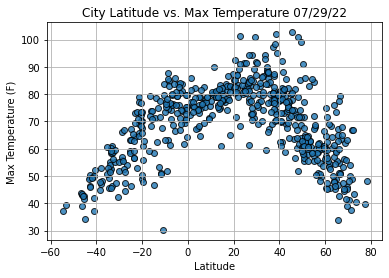

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

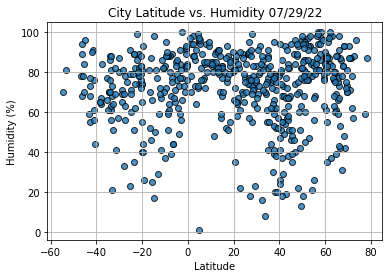

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

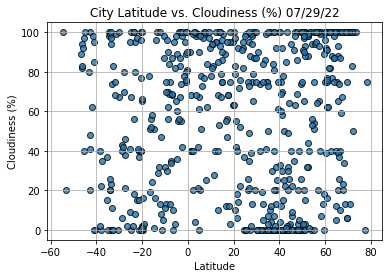

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

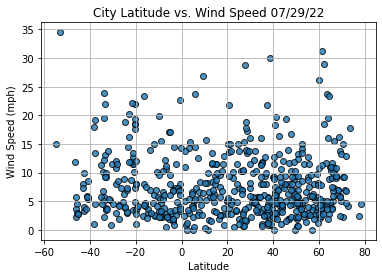

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-07-29 23:55:44
Lat                      -46.1927
Lng                      168.8643
Max Temp                    43.48
Humidity                       89
Cloudiness                     83
Wind Speed                   2.19
Name: 13, dtype: object

In [20]:
city_data_df.head(10)["Lat"] >= 0

0    False
1    False
2     True
3    False
4     True
5     True
6     True
7    False
8    False
9    False
Name: Lat, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Cherskiy,RU,2022-07-29 23:55:40,68.7500,161.3000,62.29,42,13,16.26
4,Victoria,HK,2022-07-29 23:53:13,22.2855,114.1577,89.26,82,72,8.99
5,Krasnovishersk,RU,2022-07-29 23:55:41,60.4078,57.0820,55.76,82,92,2.06
6,Kapaa,US,2022-07-29 23:55:41,22.0752,-159.3190,83.48,67,14,5.01
12,Ribeira Grande,PT,2022-07-29 23:54:57,38.5167,-28.7000,73.76,71,13,0.94


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

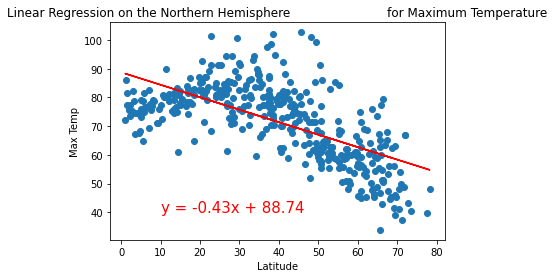

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

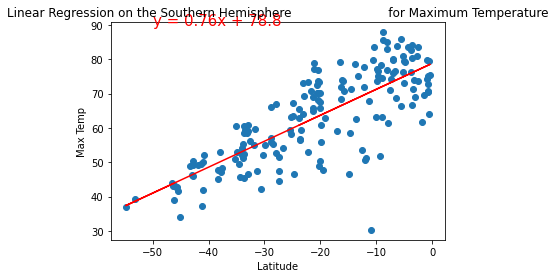

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

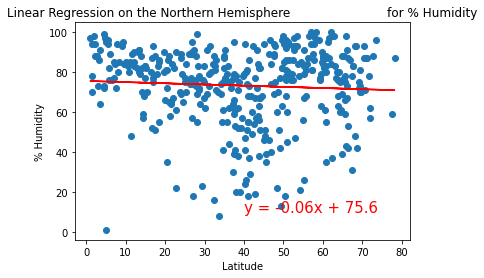

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

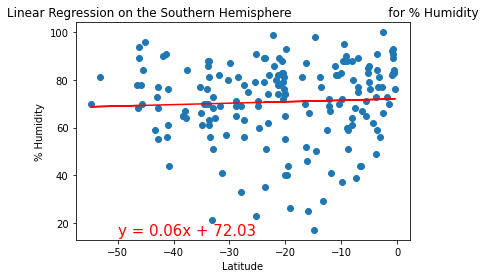

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

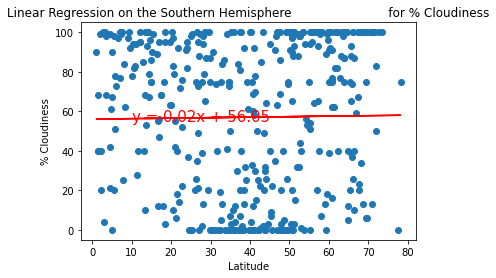

In [27]:
## Skill drill
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

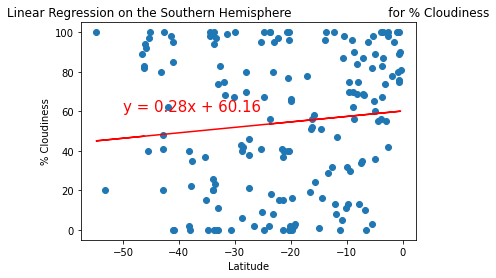

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

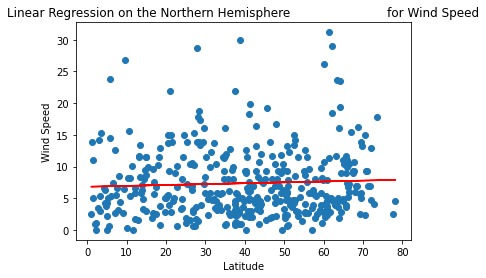

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

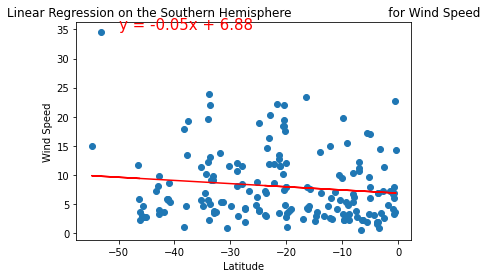

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [31]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [33]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kaitangata,NZ,2022-07-29 23:55:39,-46.2817,169.8464,43.07,68,82,5.82
1,1,Ushuaia,AR,2022-07-29 23:55:39,-54.8000,-68.3000,37.06,70,100,14.97
2,2,Cherskiy,RU,2022-07-29 23:55:40,68.7500,161.3000,62.29,42,13,16.26
3,3,Cape Town,ZA,2022-07-29 23:50:57,-33.9258,18.4232,52.12,88,20,5.75
4,4,Victoria,HK,2022-07-29 23:53:13,22.2855,114.1577,89.26,82,72,8.99


In [34]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [35]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [36]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [37]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],
                                 dissipating=False, max_intensity=300, point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [39]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [42]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,4,Victoria,HK,2022-07-29 23:53:13,22.2855,114.1577,89.26,82,72,8.99
6,6,Kapaa,US,2022-07-29 23:55:41,22.0752,-159.3190,83.48,67,14,5.01
10,10,Kavieng,PG,2022-07-29 23:55:43,-2.5744,150.7967,83.71,66,42,11.43
11,11,Vaini,TO,2022-07-29 23:55:44,-21.2000,-175.2000,78.96,89,40,11.50
21,21,Bud,US,2022-07-29 23:53:44,39.4470,-86.1758,78.64,57,61,3.65
22,22,Bengkulu,ID,2022-07-29 23:55:48,-3.8004,102.2655,76.21,73,100,1.54
28,28,Kismayo,SO,2022-07-29 23:55:50,-0.3582,42.5454,75.40,76,81,14.34
30,30,Sidi Ali,DZ,2022-07-29 23:55:51,36.0998,0.4206,77.25,75,4,2.66
32,32,Anloga,GH,2022-07-29 23:55:52,5.7947,0.8973,75.06,82,78,14.45
33,33,Bethel,US,2022-07-29 23:55:16,41.3712,-73.4140,80.76,73,78,6.08


In [43]:
preferred_cities_df.count()

City_ID       209
City          209
Country       209
Date          209
Lat           209
Lng           209
Max Temp      209
Humidity      209
Cloudiness    209
Wind Speed    209
dtype: int64

In [44]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Victoria,HK,89.26,22.2855,114.1577,
6,Kapaa,US,83.48,22.0752,-159.3190,
10,Kavieng,PG,83.71,-2.5744,150.7967,
11,Vaini,TO,78.96,-21.2000,-175.2000,
21,Bud,US,78.64,39.4470,-86.1758,
22,Bengkulu,ID,76.21,-3.8004,102.2655,
28,Kismayo,SO,75.40,-0.3582,42.5454,
30,Sidi Ali,DZ,77.25,36.0998,0.4206,
32,Anloga,GH,75.06,5.7947,0.8973,
33,Bethel,US,80.76,41.3712,-73.4140,


In [45]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [54]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")
hotel_df.head(10)

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


,City,Country,Max Temp,Lat,Lng,Hotel Name
4,Victoria,HK,89.26,22.2855,114.1577,Mini Central
6,Kapaa,US,83.48,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
10,Kavieng,PG,83.71,-2.5744,150.7967,Nusa Island Retreat
11,Vaini,TO,78.96,-21.2000,-175.2000,Keleti Beach Resort
21,Bud,US,78.64,39.4470,-86.1758,Ted McQuinn Trust
22,Bengkulu,ID,76.21,-3.8004,102.2655,Grage Hotel Bengkulu
28,Kismayo,SO,75.40,-0.3582,42.5454,Agan-Hotel
30,Sidi Ali,DZ,77.25,36.0998,0.4206,Complexe touristique haje bezine
32,Anloga,GH,75.06,5.7947,0.8973,Pin Drop Hotel
33,Bethel,US,80.76,41.3712,-73.4140,Courtyard by Marriott Danbury


In [55]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [58]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [59]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))